
# Simple Linear Regression with Sacramento Real Estate Data



---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [267]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [268]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import scipy.stats
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [269]:
# To check the first 5 data values
sacr_real = pd.read_csv(sac_csv)

sacr_real.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [270]:
# To check the last five values of the DataFram
sacr_real.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [271]:
# First check the data information 

sacr_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

In [272]:
# To keep a number "0" infront of the intiger, it is better to change the zip values to string 
sacr_real['zip'] = sacr_real['zip'].astype(str) 
sacr_real.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [273]:
# To check zip data type 
sacr_real.dtypes

street        object
city          object
zip           object
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [274]:
# To look how the data is discribed to get full statistical informations
sacr_real.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1312.918782,856.123224,-984.000000,950.000000,1304.000000,1718.000000,5822.000000
price,985.0,233715.951269,139088.818896,-210944.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.445121,5.103637,-121.503471,38.482704,38.625932,38.695589,39.020808
longitude,985.0,-121.193371,5.100670,-121.551704,-121.446119,-121.375799,-121.294893,38.668433


In [275]:
#Answer: 
 #There are negative rooms areas, and also zero price bed and baths rooms which don't have any physical meaning. 
# Sacramento is located in 38.58, and -121.49 latitude and longitude coordinates as referred (https://latitudelongitude.org/us/sacramento/)

In [276]:
# There is some house without bed and bathroom. This may be a house with one single room that has served for all purposes
# The "sq__ft" zero value does not have any real meaning

sacr_real[(sacr_real['baths']== 0) & (sacr_real['beds'])== 0].describe()


,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [277]:
# There are 108 rows both without bed and bathrooms 
sacr_real[(sacr_real['baths']== 0) & (sacr_real['beds']== 0)].shape

(108, 12)

In [278]:
# There are 108 rows room without bed room 
sacr_real[(sacr_real['baths']==0)].shape

(108, 12)

In [279]:
# There are 108 rows room without bed room 
sacr_real[(sacr_real['beds']==0)].shape

(108, 12)

In [280]:
# Negative house prices
sacr_real[(sacr_real['price']<=0)].shape 

(1, 12)

In [281]:
# Negative house price data also have negative room areas with different state 'AC'
# This may be typo error "AC"

sacr_real[(sacr_real['price']<=0)].head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [282]:
# Let's check if any other values are labeled incorrectly.
# this proves there is only one data with error state value out of "CA" that most likely typo error during data collection.

sacr_real[sacr_real['state'] != 'CA'].head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [283]:
# Drop the "AC" to make uniform state

sacr_real.drop(sacr_real.index[703], axis=0, inplace=True)

In [284]:
sacr_real.shape

(984, 12)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

In [285]:
#Answer: the 'Beds','baths', and'sq__ft' can be used as valued feature for  potential prediction.

In [286]:
# Select variables required for SLR model
sacr_real2 = sacr_real[['zip', 'beds','baths','sq__ft','price', 'sale_date']]

sacr_real2.head()

,zip,beds,baths,sq__ft,price,sale_date
0,95838,2,1,836,59222,Wed May 21 00:00:00 EDT 2008
1,95823,3,1,1167,68212,Wed May 21 00:00:00 EDT 2008
2,95815,2,1,796,68880,Wed May 21 00:00:00 EDT 2008
3,95815,2,1,852,69307,Wed May 21 00:00:00 EDT 2008
4,95824,2,1,797,81900,Wed May 21 00:00:00 EDT 2008


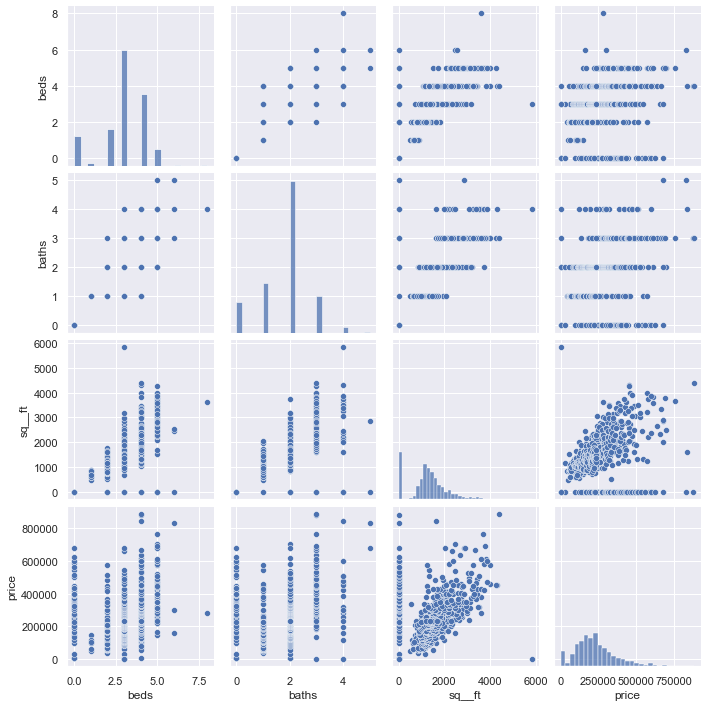

In [287]:
# plot pairs to visually evaluate possible correlations

sns.pairplot(sacr_real2)

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

In [288]:
# Save the clean dataframe without index in csv file
sacr_real.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv', index=False)

In [289]:
sacr_real.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


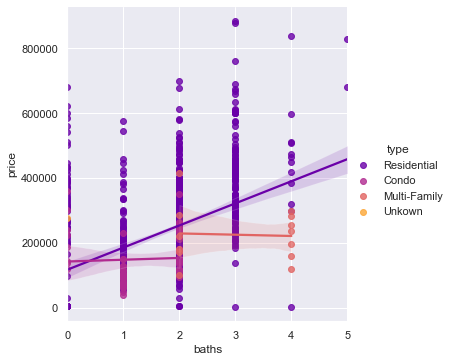

In [290]:
# Plot 1: the relationship between baths and price.

sns.lmplot(x='baths', y='price', data=sacr_real, hue= "type", palette='plasma')

plt.show()

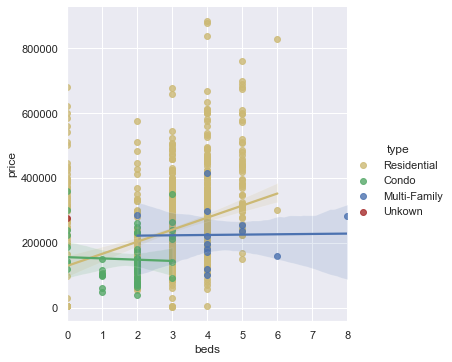

In [291]:
# # Plot 2: the relationship between beds vs price.

sns.lmplot(x='beds', y='price', data=sacr_real, hue= "type", palette=["y", "g", "b", "brown"])

plt.show()

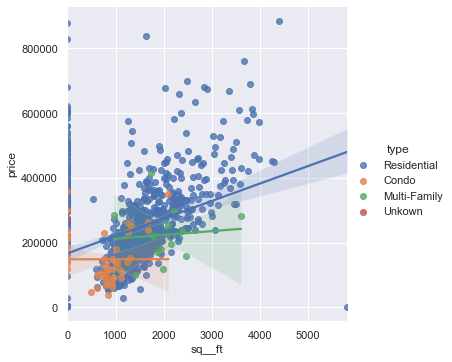

In [292]:
# Plot 3: the relationship between area of the hous vs price.

sns.lmplot(x='sq__ft', y='price', data=sacr_real, hue= "type")

plt.show()

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [293]:
# Answer:
# I think the area of the house (sq_ft) looks the best predictor since the data are continuously distributed at a linear relationship with price, unlike the beds and baths.

### 5. Build a function that takes in two lists, `Y` and `X`, as parameters and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

>_**Note:**_ You should **not** instantiate a linear regression model or implement any methods from `sklearn` to create this function. 

In [294]:
#A fuction of a linear regression line with the equation Y = mx+c 
def slop_intercept(x,y):
    m = (scipy.stats.pearsonr(x,y)[0])*(np.std(y)/np.std(x))  # slope of y = mx+ b is 'm'
    b = np.mean(y)-(m*np.mean(x))
    m = round (m, 3)
    b = round (b, 3) # coefficient 
    return m, b

In [295]:
# To find the slope and intercept values of area with price of the house dependence 
x = sacr_real['sq__ft'].values
y = sacr_real['price'].values
m, b = slop_intercept(x,y) 

print(f"{b} is the Y intercept")
print(f"{m} is the slope of the line")

162938.738 is the Y intercept
54.156 is the slope of the line


### 6. Interpret the intercept. Interpret the slope.

In [296]:
# The intercept indicates the initial prices without the area around 162938. This may be the outlier of the data since there is no house with zero sq_ft for physical meaning. However, this intercept value gives freedom to the linear regression model values

# The slope tells that for every increment of a unit area there leads to around $54 price value increment. 
# It is a good indicator to determine how much will be the house price with an increase in the area as a target variable.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [297]:
# In terms of prediction: use to estimate the house price for a real estate company based on the size and location of the house.

# Inference:
# for construction or consulting company that wants to understand the specific locations and housing types.

In [298]:
# A: This model can be used to get a line of best fit for predicting independent 
 # the value of dependent varaible for every value of the independent input varaible.

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [299]:
# Answer:# the equation y = 162938.74 + 54.16x is a predictor.
# To create a list of predictor

x = sacr_real[['zip', 'beds','baths','sq__ft']]
y = sacr_real['price']

In [300]:
lm = LinearRegression()

In [301]:
lm.fit(x,y)

LinearRegression()

In [302]:
predictions = lm.predict(x)

In [303]:
# Residuals
residuals = y- predictions
residuals.mean()

1.173617878580481e-10

Text(0, 0.5, 'Residuals')

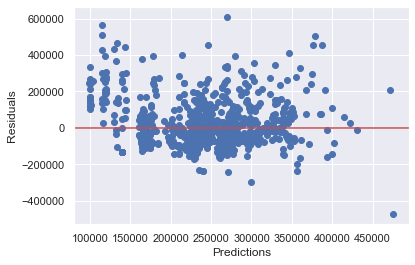

In [304]:
## plot residuals which is distribute in both sides.
plt.scatter(predictions, residuals)
plt.axhline(0, color='r')

plt.xlabel('Predictions')
plt.ylabel('Residuals')

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [305]:
# check what are the values of the type in the column
sacr_real['type'].unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

In [306]:
# Create dummies for 'type' column
typeDummy = pd.get_dummies(sacr_real['type'])
typeDummy.head()

,Condo,Multi-Family,Residential,Unkown
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove the "Unkown" variable from the four variables in your dummy-coded  dataframe and add the remaining dummy-coded variables to the original dataframe.
> _**Note:**_ You may have already created the dummy columns on the original dataframe. If so, you can just leave them there, no problem, but still remove "Unkown".  
_**Hint:**_ You also may not see an "Unkown" dummy column. If you don't see it, identify in which step above you removed all "Unkown" observations.

In [307]:
# To drop the "Unknown" from the dummies variable of type column
typeDummy.drop('Unkown', axis=1, inplace=True)
sacr_real.head(3)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839


In [308]:
# A:
sacr_real['type'].unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

In [309]:
# Dummify the "type" column
type_dummy= pd.get_dummies(sacr_real['type'])

sacr_real = sacr_real.merge(type_dummy, left_index=True, right_index=True)

sacr_real.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Condo,Multi-Family,Residential,Unkown
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,0,1,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,0,1,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,0,1,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,0,1,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,0,1,0


### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [310]:
# Creating the dummy variable of Huge Houses

sacr_real['Huge_homes'] = (sacr_real['sq__ft'] > 3775).astype(int)

In [311]:
sacr_real.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Condo,Multi-Family,Residential,Unkown,Huge_homes
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,0,1,0,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,0,1,0,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,0,1,0,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,0,1,0,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,0,1,0,0


In [312]:
# How many variables 'Huge_homes' dummy has:
sacr_real['Huge_homes'].value_counts()

0    974
1     10
Name: Huge_homes, dtype: int64

In [313]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
features = ['beds', 'baths', 'sq__ft','Residential']
X = sacr_real[features]
y = sacr_real['price']

In [314]:
model=lr.fit(x,y)

In [315]:
prediction= model.predict(x)

In [316]:
# getting coefficients
lr.score(x,y)

0.19718816770819203

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

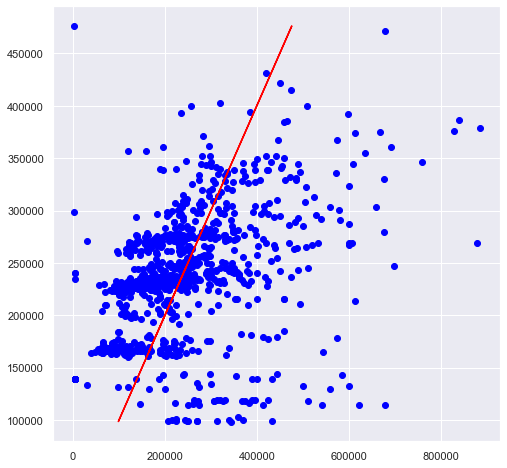

In [317]:
# The actual versus the predicted values
plt.figure(figsize= (8,8))
plt.scatter(y, prediction, color='blue')
plt.plot(prediction, prediction, color='red')

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

In [318]:
# The following four points of MLR modeling have the same assumption as SLR modeling

#1-Normality: The errors shows a Normal distribution
#2-Linearity:  The relationship between X and Y must be linear
#3-Independence of errors:  There is no relationship between the residuals and the Y variable(Y is independent of errors)
#4-Equality of Variances: The errors show a stable pattern independent of the value.

#The different one (only MLR)
#1-The independent variables are independent of one an others


### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [319]:
# A:
#It seems that the model satisfies linearity ( price has a linear relationship with the independent variables)
#But it may not be free of independence. For instance, the number of bedrooms and bathrooms may be highly correlated

In [320]:
#Answer:  The errors graph is closely normal distribution except a little skewed to the right. 

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [321]:
import statsmodels.api as sm
sacr_real['intercept'] = 1
X = sacr_real[['intercept','sq__ft','beds','baths','Huge_homes']]
y = sacr_real['price']

model = sm.OLS(y,X).fit() # ordinary least squares regression OLS

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [322]:
# Answer:Implement a function called r2_adj() that will calculate 𝑅2 𝑎𝑑𝑗 for a model

def r2_adj(y_actual, y_preds, p):
    m = len(y_actual) # to get total actual Y values
    dd = np.mean(y_actual)
    ss = (m - 1)# denominator
    hh = (ss-p) # denominator
    yy = np.sum(np.square(y_actual - y_preds)) / hh
    ww = np.sum(np.square(y_actual - dd)) / ss
    return (ww - yy) / ww

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [323]:
# Answer: Function to calculate six regeration metrics.

def six_reg_metrics(y_actual, y_pred, p):
    mse = metrics.mean_squared_error(y_actual, prediction)
    msle = metrics.mean_squared_log_error(y_actual, prediction)   
    mae = metrics.median_absolute_error(y_actual, prediction)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_actual, prediction)
    r2a = r2_adj(y_actual, prediction, p)
    
    print(f'{mse} is the mean squared error')
    print(f'{msle} is mean squared log error')
    print(f'{mae} is median absolute error')
    print(f'{rmse} is root mean squared error')
    print(f'{r2} is R squared')
    print(f'{r2a} is adjusted R squared')

### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [324]:
# Answer: Evaluation of the six regression function created at point "16"
six_reg_metrics(sacr_real['price'], prediction, X.shape[1])

15369477578.386997 is the mean squared error
0.8739357153690296 is mean squared log error
74259.81124230474 is median absolute error
123973.697123168 is root mean squared error
0.19718816770819203 is R squared
0.19308381273737504 is adjusted R squared


In [325]:
#Answer: Re-evaluate the the model
features = ['beds', 'baths', 'sq__ft', 'Residential', 'Huge_homes']
X = sacr_real[features].values
y = sacr_real['price'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

In [326]:
sacr_real.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude', 'Condo', 'Multi-Family',
       'Residential', 'Unkown', 'Huge_homes', 'intercept'],
      dtype='object')

In [327]:
six_reg_metrics(sacr_real['price'], y_pred, X.shape[1])

15369477578.386997 is the mean squared error
0.8739357153690296 is mean squared log error
74259.81124230474 is median absolute error
123973.697123168 is root mean squared error
0.19718816770819203 is R squared
0.19308381273737504 is adjusted R squared


In [328]:
sacr_real['type'].dtype

dtype('O')

### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [329]:
# Answer:
cv_scores = cross_val_score(model, X, y)
print(cv_scores)
print(np.mean(cv_scores))

[ 0.21407118  0.17405696  0.2555687  -0.2099718  -0.07216056]
0.07231289535726929
